In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df), columns=ss.get_feature_names_out())
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [4]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
y = df.iloc[:,-1:]
X = df_scaled.iloc[:,:-1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.20) 

In [7]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    float64
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    float64
 8   Outcome        768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [8]:
y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
operations = [('knn', knn)]
pipe = Pipeline(operations)

# Set up GridSearchCV for hyperparameter tuning
k_values = list(range(1, 20))
param_grid = {'knn__n_neighbors': k_values}
full_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

full_classifier.fit(X_train, y_train)

best_params = full_classifier.best_estimator_.get_params()
print(best_params)

C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

{'memory': None, 'steps': [('knn', KNeighborsClassifier(n_neighbors=11))], 'verbose': False, 'knn': KNeighborsClassifier(n_neighbors=11), 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'uniform'}


C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [11]:
y_pred = full_classifier.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f'Accuracy: {accuracy}')
print(f'Error Rate: {error_rate}')

Accuracy: 0.7142857142857143
Error Rate: 0.2857142857142857


[[78 21]
 [23 32]]


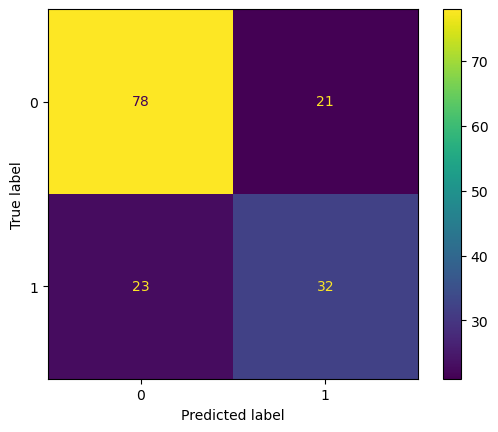

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

CMD = ConfusionMatrixDisplay(cm).plot()

In [14]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.6037735849056604
Recall: 0.5818181818181818


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        99
           1       0.60      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154



### What is GridSearchCV?
GridSearchCV is a technique provided by Scikit-Learn to automate the process of hyperparameter tuning. It helps you find the best combination of hyperparameters for your machine learning model by systematically searching through a predefined grid of hyperparameters and evaluating model performance using cross-validation.

### Why Use GridSearchCV?
When building machine learning models, selecting the right set of hyperparameters (like the number of neighbors in KNN, the depth of trees in a Random Forest, or the value of regularization in Logistic Regression) is crucial for optimal model performance. However, manually tuning these hyperparameters can be time-consuming and error-prone. GridSearchCV automates this process, ensuring a thorough search and evaluation.

### How GridSearchCV Works
1. Define a Parameter Grid:
You specify a dictionary where keys are hyperparameter names, and values are lists of values to try.

2. Cross-Validation:
For each combination of hyperparameters, the model is trained and validated using cross-validation (e.g., K-Fold CV). This helps in assessing model performance more reliably.

3. Model Evaluation:
The model is evaluated using a scoring metric like accuracy, precision, recall, or any other metric you choose.

4. Select the Best Model:
After evaluating all possible combinations, GridSearchCV selects the set of hyperparameters that resulted in the best performance.

## What is KNeighborsClassifier?
The KNeighborsClassifier is a machine learning algorithm provided by Scikit-Learn for classification tasks. It belongs to the family of instance-based learning algorithms, specifically known as the K-Nearest Neighbors (KNN) algorithm.

The main idea behind KNN is to classify a data point based on how its neighbors are classified. It’s a supervised learning algorithm that can be used for both classification and regression problems, but it's primarily used for classification.

## How KNeighborsClassifier Works
1. Choosing k Neighbors:
The algorithm starts by selecting the number of neighbors (k). This value is a user-defined hyperparameter, and it represents how many nearest data points (neighbors) will be considered when making a prediction.

2. Calculating Distance:
For a new data point (the one you want to classify), the algorithm calculates the distance between this point and all the points in the training dataset.
Common distance metrics include:
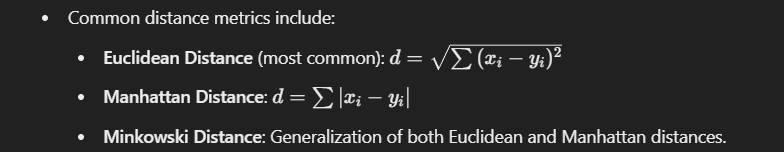

3. Finding the Nearest Neighbors:
After calculating the distances, the algorithm selects the k closest points (neighbors) to the new data point.

4. Voting:
The algorithm performs a majority vote among the selected k neighbors.
The class that appears the most among these neighbors is assigned to the new data point.

5. Assigning the Class:
The new data point is classified into the class with the highest vote among its neighbors.